In [35]:
import pandas as pd


df = pd.read_csv("sreality_combined.csv")
df

,scrape_date,hash_id,name,locality,district,neighborhood,price_czk,size_m2,rooms,floor,...,balcony,terrace,energy_rating,ownership,parking,cellar,loggia,heating,apartment_type,note_about_price
0,2026-02-09,1584403276,Pronájem bytu 4+kk 84 m²,"Slavíkova, Praha 2 - Vinohrady",Praha 2,Vinohrady,50500,84,4+kk,1. podlaží,...,NaN,NaN,Třída F - Velmi nehospodárná č. 264/2020 Sb. p...,Osobní,NaN,NaN,NaN,NaN,NaN,Poplatky za služby + provize 1 měsíční nájem p...
1,2026-02-09,4204737356,Pronájem bytu 2+kk 49 m²,"U nových domů I, Praha - Krč",NaN,NaN,29000,49,2+kk,1. podlaží,...,NaN,NaN,NaN,Družstevní,NaN,6,2,NaN,NaN,NaN
2,2026-02-09,342692684,Pronájem bytu 3+kk 146 m²,"Malešická, Praha",NaN,NaN,46000,146,3+kk,6. podlaží,...,42,NaN,NaN,Osobní,1,6,NaN,NaN,NaN,elektřina se převádí na nájemníka
3,2026-02-09,2642613068,Pronájem bytu 3+kk 121 m²,"Tibetská, Praha - Vokovice",NaN,NaN,40000,121,3+kk,4. podlaží,...,3,12,Třída D - Méně úsporná,Osobní,3,6,NaN,NaN,NaN,poplatky jsou závislé na počtu osob
4,2026-02-09,3349615436,Pronájem bytu 1+kk 114 m² (Loft),"Křížová, Praha 5 - Smíchov",Praha 5,Smíchov,45000,114,1+kk,5. podlaží,...,NaN,NaN,Třída D - Méně úsporná,Osobní,NaN,NaN,NaN,NaN,Loft,elektřina zůstává na majitele zálohy jsou 1800...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2026-02-07,1161233228,Pronájem bytu 3+kk 60 m²,"Habartická, Praha 9 - Střížkov",Praha 9,Střížkov,17900,60,3+kk,2. podlaží z celkem 8,...,True,NaN,Třída G - Mimořádně nehospodárná,Osobní,NaN,True,True,Ústřední dálkové,NaN,"vratná jistota, náklady na bydlení 6.000,-Kč, ..."
3286,2026-02-07,2045227852,Pronájem bytu 4+kk 92 m²,"Kazašská, Praha 10 - Vršovice",Praha 10,Vršovice,49500,92,4+kk,3. podlaží z celkem 12,...,NaN,NaN,Třída G - Mimořádně nehospodárná,Osobní,NaN,NaN,15,NaN,NaN,"+ kauce, + provize RK, bez poplatků"
3287,2026-02-07,61567820,Pronájem bytu 3+kk 111 m²,"Šmeralova, Praha 7 - Bubeneč",Praha 7,Bubeneč,50000,111,3+kk,1. podlaží,...,NaN,80,Třída G - Mimořádně nehospodárná č. 264/2020 S...,Osobní,NaN,NaN,NaN,NaN,NaN,Provize RK je jeden měsíční nájem plus 21 % DPH.
3288,2026-02-07,2356573004,Pronájem bytu 3+kk 80 m² (Mezonet),"Bělohorská, Praha 6 - Břevnov",Praha 6,Břevnov,32000,80,3+kk,4. podlaží z celkem 5,...,4,NaN,NaN,Osobní,NaN,NaN,NaN,Lokální plynové,Mezonet,NaN


In [4]:
for col in df.columns:
    filled = df[col].notna().sum()
    if df[col].dtype == 'object':
        filled = df[col].notna().sum() - (df[col] == '').sum()

    pct = filled / len(df) * 100
    bar = '#' * int(pct / 5) + '-' * (20 - int(pct / 5))
    print(f"  {col:<25} [{bar}] {pct:.0f}%  ({filled}/{len(df)})")

  scrape_date               [####################] 100%  (3290/3290)
  hash_id                   [####################] 100%  (3290/3290)
  name                      [####################] 100%  (3290/3290)
  locality                  [####################] 100%  (3290/3290)
  district                  [##################--] 93%  (3060/3290)
  neighborhood              [##################--] 92%  (3036/3290)
  price_czk                 [####################] 100%  (3290/3290)
  size_m2                   [####################] 100%  (3290/3290)
  rooms                     [###################-] 98%  (3216/3290)
  floor                     [####################] 100%  (3290/3290)
  building_type             [####################] 100%  (3290/3290)
  condition                 [####################] 100%  (3290/3290)
  furnished                 [##############------] 74%  (2423/3290)
  elevator                  [#############-------] 69%  (2262/3290)
  balcony                   [#####-----

# Price statistics

In [6]:
df['price_czk'] = pd.to_numeric(df['price_czk'], errors='coerce')

print(f"Min: {df['price_czk'].min():,.0f} Kc")
print(f"Max: {df['price_czk'].max():,.0f} Kc")
print(f"Average: {df['price_czk'].mean():,.0f} Kc")
print(f"Median: {df['price_czk'].median():,.0f} Kc")
print(f"Price = 1 (placeholder): {(df['price_czk'] == 1).sum()}")
print(f"Price < 3,000 (too low): {(df['price_czk'] < 3000).sum()}")
print(f"Price > 150,000 (too high): {(df['price_czk'] > 150000).sum()}")


Min: 1 Kc
Max: 500,000 Kc
Average: 32,097 Kc
Median: 25,000 Kc
Price = 1 (placeholder): 18
Price < 3,000 (too low): 20
Price > 150,000 (too high): 9


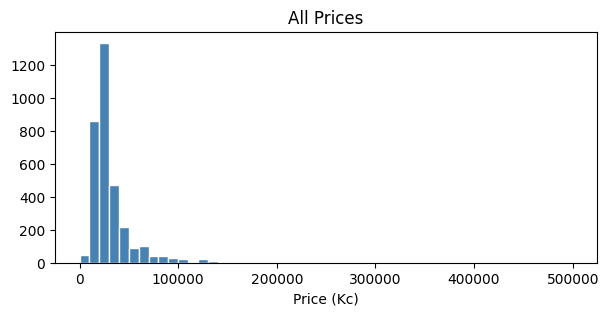

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 3))

plt.hist(df['price_czk'].dropna(), bins=50, color='steelblue', edgecolor='white')
plt.title('All Prices')
plt.xlabel('Price (Kc)')

plt.show()



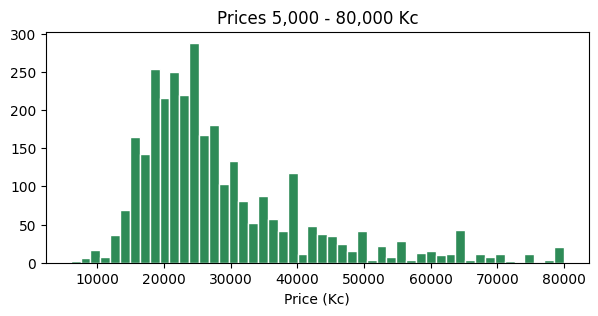

In [15]:
plt.figure(figsize=(7, 3))

reasonable = df[(df['price_czk'] >= 5000) & (df['price_czk'] <= 80000)]['price_czk']
plt.hist(reasonable, bins=50, color='seagreen', edgecolor='white')
plt.title('Prices 5,000 - 80,000 Kc')
plt.xlabel('Price (Kc)')

plt.show()

# How much data does not have a district

In [16]:
print(f"Missing district: {(df['district'] == '').sum() + df['district'].isna().sum()}")


Missing district: 230


# Data Cleaning

removing unrealisrtic prices, districts and rooms if null. changing size_m2 into int

In [36]:
print(len(df))


df = df[df['price_czk'] != 1]

print(len(df))

df = df[(df['price_czk'] >= 3000) & (df['price_czk'] <= 150000)]

print(len(df))

df = df[df['district'].notna() & (df['district'] != '')]

print(len(df))

df = df[df['rooms'].notna() & (df['rooms'] != '')]

print(len(df))

df['size_m2'] = pd.to_numeric(df['size_m2'], errors='coerce')

df = df[(df['size_m2'] >= 10) & (df['size_m2'] <= 300)]

print(len(df))




3290
3272
3261
3036
2970
2962


# Extracting floor number from text

adding a new column floor_number where is only the numeric value of the floor

In [40]:
import re

def parse_floor(text):
  if pd.isna(text) or text == '':
    return None
  match = re.search(r'(\d+)\.\s*podla', str(text))
  if match:
    return int(match.group(1))
  return None

df['floor_number'] = df['floor'].apply(parse_floor)

df

,scrape_date,hash_id,name,locality,district,neighborhood,price_czk,size_m2,rooms,floor,...,terrace,energy_rating,ownership,parking,cellar,loggia,heating,apartment_type,note_about_price,floor_number
0,2026-02-09,1584403276,Pronájem bytu 4+kk 84 m²,"Slavíkova, Praha 2 - Vinohrady",Praha 2,Vinohrady,50500,84,4+kk,1. podlaží,...,NaN,Třída F - Velmi nehospodárná č. 264/2020 Sb. p...,Osobní,NaN,NaN,NaN,NaN,NaN,Poplatky za služby + provize 1 měsíční nájem p...,1.0
4,2026-02-09,3349615436,Pronájem bytu 1+kk 114 m² (Loft),"Křížová, Praha 5 - Smíchov",Praha 5,Smíchov,45000,114,1+kk,5. podlaží,...,NaN,Třída D - Méně úsporná,Osobní,NaN,NaN,NaN,NaN,Loft,elektřina zůstává na majitele zálohy jsou 1800...,5.0
5,2026-02-09,2454782796,Pronájem bytu 3+kk 111 m² (Jednopodlažní),"Anny Letenské, Praha 2 - Vinohrady",Praha 2,Vinohrady,44000,111,3+kk,3. podlaží,...,NaN,NaN,Osobní,NaN,NaN,NaN,NaN,Jednopodlažní,NaN,3.0
6,2026-02-09,1436250956,Pronájem bytu 2+1 90 m²,"U Blaženky, Praha 5 - Smíchov",Praha 5,Smíchov,26000,90,2+1,2. podlaží,...,35,NaN,Osobní,NaN,NaN,NaN,NaN,NaN,elektřina a plyn se převádí na nájemce,2.0
7,2026-02-09,2117956428,Pronájem bytu 3+1 104 m² (Podkrovní),"Na Hanspaulce, Praha 6 - Dejvice",Praha 6,Dejvice,41000,104,3+1,3. podlaží,...,NaN,NaN,Osobní,NaN,NaN,NaN,NaN,Podkrovní,plyn a elektřina se převádí na nájemce,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2026-02-07,1161233228,Pronájem bytu 3+kk 60 m²,"Habartická, Praha 9 - Střížkov",Praha 9,Střížkov,17900,60,3+kk,2. podlaží z celkem 8,...,NaN,Třída G - Mimořádně nehospodárná,Osobní,NaN,True,True,Ústřední dálkové,NaN,"vratná jistota, náklady na bydlení 6.000,-Kč, ...",2.0
3286,2026-02-07,2045227852,Pronájem bytu 4+kk 92 m²,"Kazašská, Praha 10 - Vršovice",Praha 10,Vršovice,49500,92,4+kk,3. podlaží z celkem 12,...,NaN,Třída G - Mimořádně nehospodárná,Osobní,NaN,NaN,15,NaN,NaN,"+ kauce, + provize RK, bez poplatků",3.0
3287,2026-02-07,61567820,Pronájem bytu 3+kk 111 m²,"Šmeralova, Praha 7 - Bubeneč",Praha 7,Bubeneč,50000,111,3+kk,1. podlaží,...,80,Třída G - Mimořádně nehospodárná č. 264/2020 S...,Osobní,NaN,NaN,NaN,NaN,NaN,Provize RK je jeden měsíční nájem plus 21 % DPH.,1.0
3288,2026-02-07,2356573004,Pronájem bytu 3+kk 80 m² (Mezonet),"Bělohorská, Praha 6 - Břevnov",Praha 6,Břevnov,32000,80,3+kk,4. podlaží z celkem 5,...,NaN,NaN,Osobní,NaN,NaN,NaN,Lokální plynové,Mezonet,NaN,4.0


# Selecting columns that we need to save into a new cleaned dataset

In [44]:
df_clean = df[['district', 'size_m2', 'rooms', 'floor_number', 'building_type', 'condition', 'ownership', 'price_czk']].copy()

df_clean

,district,size_m2,rooms,floor_number,building_type,condition,ownership,price_czk
0,Praha 2,84,4+kk,1.0,Smíšená,Po rekonstrukci,Osobní,50500
4,Praha 5,114,1+kk,5.0,Skeletová,Velmi dobrý,Osobní,45000
5,Praha 2,111,3+kk,3.0,Cihlová,Velmi dobrý,Osobní,44000
6,Praha 5,90,2+1,2.0,Cihlová,Po rekonstrukci,Osobní,26000
7,Praha 6,104,3+1,3.0,Cihlová,Velmi dobrý,Osobní,41000
...,...,...,...,...,...,...,...,...
3285,Praha 9,60,3+kk,2.0,Panelová,Dobrý,Osobní,17900
3286,Praha 10,92,4+kk,3.0,Panelová,Velmi dobrý,Osobní,49500
3287,Praha 7,111,3+kk,1.0,Smíšená,Velmi dobrý,Osobní,50000
3288,Praha 6,80,3+kk,4.0,Cihlová,Novostavba,Osobní,32000


# Removing any rows with missing values

In [45]:

print(len(df_clean))

df_clean = df_clean.dropna()

print(len(df_clean))

2962
2940


# Visualizing cleaned data

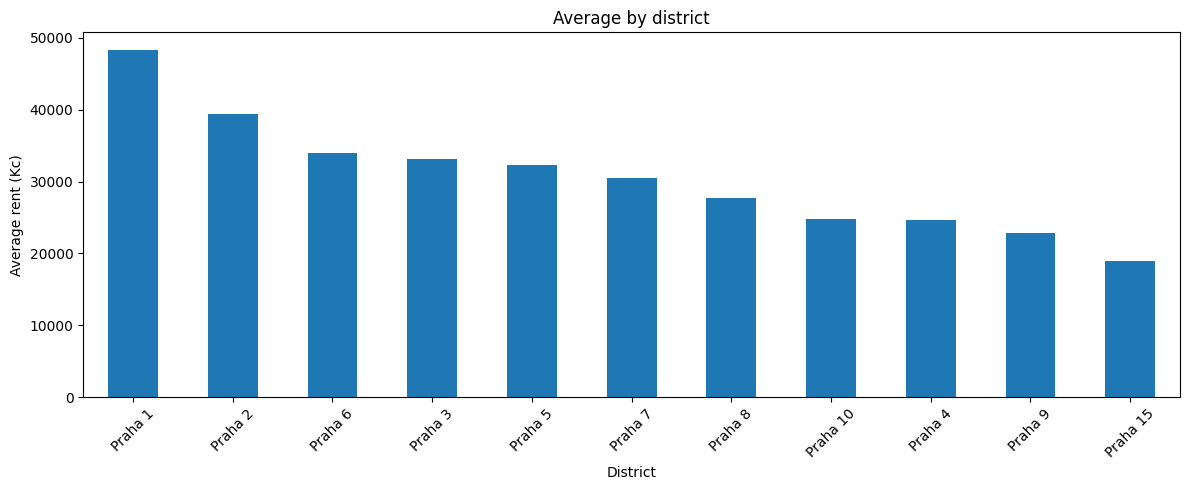

In [49]:
avg_price = df_clean.groupby('district')['price_czk'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
avg_price.plot(kind='bar')

plt.title('Average by district')
plt.xlabel('District')
plt.ylabel('Average rent (Kc)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

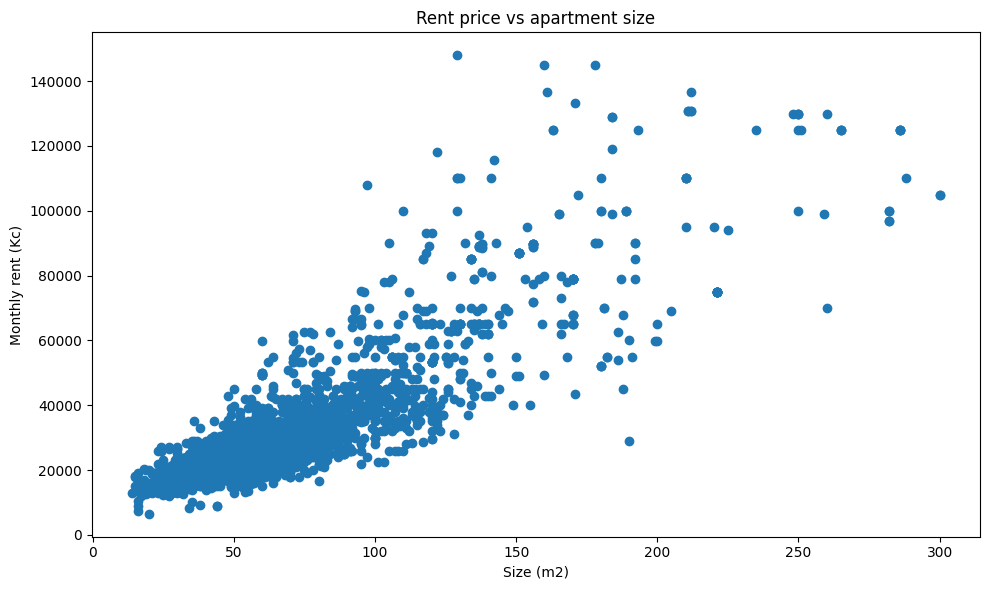

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean['size_m2'], df_clean['price_czk'])
plt.title('Rent price vs apartment size')
plt.xlabel('Size (m2)')
plt.ylabel('Monthly rent (Kc)')
plt.tight_layout()
plt.show()

# Saving data into a new .csv file

In [54]:
df_clean.to_csv('sreality_cleaned.csv', index=False, encoding='utf-8-sig')
